In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pl.read_csv("ingested.csv")

df_filter = df.filter(
    (pl.col("year_of_sale").is_in([2023, 2024])),
)

In [3]:
df_million_2023 = df_filter.filter(
    pl.col("year_of_sale").eq(2023)
).group_by(
    pl.col("year_of_sale"), pl.col("price_is_geq_one_million")
).agg(
    pl.len().alias("count_transactions")
).sort(
    pl.col("price_is_geq_one_million"), descending=False
).with_columns(
    (pl.col("count_transactions") / pl.col("count_transactions").sum()).alias("pct_transactions")
)
display(df_million_2023)

year_of_sale,price_is_geq_one_million,count_transactions,pct_transactions
i64,i64,u32,f64
2023,0,25286,0.98179
2023,1,469,0.01821


In [4]:
df_million_2024 = df_filter.filter(
    pl.col("year_of_sale").eq(2024), pl.col("month_of_sale").le(11), pl.col("price_is_geq_one_million").eq(1)
).group_by(
    pl.col("year_of_sale"), pl.col("month_of_sale"), pl.col("price_is_geq_one_million")
).agg(
    pl.len().alias("count_transactions")
).sort(
    pl.col("price_is_geq_one_million"), descending=False
).with_columns(
    (pl.col("count_transactions") / pl.col("count_transactions").sum()).alias("pct_transactions")
)
with pl.Config(tbl_rows = 20):
    print(df_million_2024.sort("month_of_sale"))
    print(df_million_2024.select("count_transactions").sum())

shape: (11, 5)
┌──────────────┬───────────────┬──────────────────────────┬────────────────────┬──────────────────┐
│ year_of_sale ┆ month_of_sale ┆ price_is_geq_one_million ┆ count_transactions ┆ pct_transactions │
│ ---          ┆ ---           ┆ ---                      ┆ ---                ┆ ---              │
│ i64          ┆ i64           ┆ i64                      ┆ u32                ┆ f64              │
╞══════════════╪═══════════════╪══════════════════════════╪════════════════════╪══════════════════╡
│ 2024         ┆ 1             ┆ 1                        ┆ 74                 ┆ 0.078723         │
│ 2024         ┆ 2             ┆ 1                        ┆ 49                 ┆ 0.052128         │
│ 2024         ┆ 3             ┆ 1                        ┆ 60                 ┆ 0.06383          │
│ 2024         ┆ 4             ┆ 1                        ┆ 68                 ┆ 0.07234          │
│ 2024         ┆ 5             ┆ 1                        ┆ 73                 ┆ 0.07

In [5]:
df_million_2024 = df_filter.filter(
    pl.col("year_of_sale").eq(2024)
).group_by(
    pl.col("year_of_sale"), pl.col("price_is_geq_one_million")
).agg(
    pl.len().alias("count_transactions")
).sort(
    pl.col("price_is_geq_one_million"), descending=False
).with_columns(
    (pl.col("count_transactions") / pl.col("count_transactions").sum()).alias("pct_transactions")
)

print(df_million_2024)

shape: (2, 4)
┌──────────────┬──────────────────────────┬────────────────────┬──────────────────┐
│ year_of_sale ┆ price_is_geq_one_million ┆ count_transactions ┆ pct_transactions │
│ ---          ┆ ---                      ┆ ---                ┆ ---              │
│ i64          ┆ i64                      ┆ u32                ┆ f64              │
╞══════════════╪══════════════════════════╪════════════════════╪══════════════════╡
│ 2024         ┆ 0                        ┆ 26410              ┆ 0.962955         │
│ 2024         ┆ 1                        ┆ 1016               ┆ 0.037045         │
└──────────────┴──────────────────────────┴────────────────────┴──────────────────┘


In [6]:
df_by_100_000 = df_filter.with_columns(
    (pl.col("price") // 100000 * 100000).alias("price_round_down_100k")  
).filter(
    pl.col("price_is_geq_one_million").eq(1)
).group_by("price_round_down_100k").agg(
    pl.len().alias("count_transactions")
).with_columns(
  (pl.col("count_transactions") / pl.col("count_transactions").sum()).alias("pct_transactions")
).sort("price_round_down_100k")
print(df_by_100_000)

shape: (6, 3)
┌───────────────────────┬────────────────────┬──────────────────┐
│ price_round_down_100k ┆ count_transactions ┆ pct_transactions │
│ ---                   ┆ ---                ┆ ---              │
│ i64                   ┆ u32                ┆ f64              │
╞═══════════════════════╪════════════════════╪══════════════════╡
│ 1000000               ┆ 846                ┆ 0.569697         │
│ 1100000               ┆ 298                ┆ 0.200673         │
│ 1200000               ┆ 180                ┆ 0.121212         │
│ 1300000               ┆ 89                 ┆ 0.059933         │
│ 1400000               ┆ 50                 ┆ 0.03367          │
│ 1500000               ┆ 22                 ┆ 0.014815         │
└───────────────────────┴────────────────────┴──────────────────┘


In [7]:
with pl.Config(tbl_rows = 20):
    display(
        df_filter.filter(pl.col("price") > 1500000).sort("price", descending=True).select("address", "town", "flat_type", "price", "band_name")
    )

address,town,flat_type,price,band_name
str,str,str,i64,str
"""9B BOON TIONG ROAD""","""BUKIT MERAH""","""5 ROOM""",1588000,"""90 - 94"""
"""96A HENDERSON ROAD""","""BUKIT MERAH""","""5 ROOM""",1588000,"""90 - 94"""
"""126A KIM TIAN ROAD""","""BUKIT MERAH""","""5 ROOM""",1580000,"""85 - 89"""
"""139A LORONG 1A TOA PAYOH""","""TOA PAYOH""","""5 ROOM""",1568888,"""85 - 89"""
"""275A BISHAN STREET 24""","""BISHAN""","""5 ROOM""",1568000,"""85 - 89"""
"""53 JALAN MA'MOR""","""KALLANG/WHAMPOA""","""3 ROOM""",1568000,"""45 - 49"""
"""28A DOVER CRESCENT""","""QUEENSTOWN""","""5 ROOM""",1550000,"""85 - 89"""
"""1D CANTONMENT ROAD""","""CENTRAL AREA""","""5 ROOM""",1542880,"""85 - 89"""
"""1F CANTONMENT ROAD""","""CENTRAL AREA""","""5 ROOM""",1540000,"""85 - 89"""


In [8]:
with pl.Config(set_tbl_rows=30):
    display(
        df.filter(
            (pl.col("year_of_sale").eq(2024)),
            (pl.col("price_is_geq_one_million").eq(1)),
        )
        .group_by("town")
        .agg(pl.col("address").len().alias("count_transactions"))
        .sort("count_transactions", descending=True)
    )


town,count_transactions
str,u32
"""KALLANG/WHAMPOA""",154
"""TOA PAYOH""",141
"""BUKIT MERAH""",133
"""QUEENSTOWN""",106
"""BISHAN""",77
"""ANG MO KIO""",67
"""CLEMENTI""",51
"""GEYLANG""",48
"""CENTRAL AREA""",45


In [9]:
df.filter(
    (pl.col("year_of_sale").eq(2024)),
    (pl.col("price_is_geq_one_million").eq(1)),
    (pl.col("town").eq("SENGKANG"))
).sort("month_of_sale").select(
    "address", "sqft", "minimum_floor", "maximum_floor", "flat_type",
    "price", "year_of_sale", "month_of_sale"
)

address,sqft,minimum_floor,maximum_floor,flat_type,price,year_of_sale,month_of_sale
str,i64,i64,i64,str,i64,i64,i64
"""205B COMPASSVALE LANE""",1539,7,9,"""EXECUTIVE""",1000000,2024,4
"""216B COMPASSVALE DRIVE""",1205,16,18,"""5 ROOM""",1000000,2024,7
"""102 RIVERVALE WALK""",1528,10,12,"""EXECUTIVE""",1005000,2024,8
"""216B COMPASSVALE DRIVE""",1205,13,15,"""5 ROOM""",1050000,2024,11


In [10]:
df.filter(
    (pl.col("year_of_sale").eq(2024)),
    (pl.col("price_is_geq_one_million").eq(0)),
    (pl.col("town").eq("JURONG WEST"))
).sort("price", descending=True).select(
    "address", "sqft", "minimum_floor", "maximum_floor", "flat_type",
    "price", "year_of_sale", "month_of_sale"
)

address,sqft,minimum_floor,maximum_floor,flat_type,price,year_of_sale,month_of_sale
str,i64,i64,i64,str,i64,i64,i64
"""471 JURONG WEST STREET 41""",1603,10,12,"""EXECUTIVE""",980000,2024,6
"""469 JURONG WEST STREET 41""",1689,4,6,"""EXECUTIVE""",960000,2024,9
"""138D YUAN CHING ROAD""",1162,13,15,"""5 ROOM""",952888,2024,11
"""472 JURONG WEST STREET 41""",1625,13,15,"""EXECUTIVE""",940000,2024,12
"""138C YUAN CHING ROAD""",1162,13,15,"""5 ROOM""",920000,2024,6
…,…,…,…,…,…,…,…
"""112 HO CHING ROAD""",613,4,6,"""2 ROOM""",270000,2024,6
"""191 BOON LAY DRIVE""",505,4,6,"""2 ROOM""",265000,2024,5
"""191 BOON LAY DRIVE""",398,4,6,"""2 ROOM""",265000,2024,7


In [11]:
df.filter(
    (pl.col("year_of_sale").eq(2024)),
    (pl.col("price_is_geq_one_million").eq(1)),
).sort("price", descending=True).select(
    "address", "sqft", "minimum_floor", "maximum_floor", "flat_type",
    "price", "year_of_sale", "month_of_sale", "psf", "band_name"
)

address,sqft,minimum_floor,maximum_floor,flat_type,price,year_of_sale,month_of_sale,psf,band_name
str,i64,i64,i64,str,i64,i64,i64,f64,str
"""9B BOON TIONG ROAD""",1205,34,36,"""5 ROOM""",1588000,2024,6,1317.84,"""90 - 94"""
"""96A HENDERSON ROAD""",1216,46,48,"""5 ROOM""",1588000,2024,6,1305.92,"""90 - 94"""
"""126A KIM TIAN ROAD""",1216,40,42,"""5 ROOM""",1580000,2024,9,1299.34,"""85 - 89"""
"""139A LORONG 1A TOA PAYOH""",1259,40,42,"""5 ROOM""",1568888,2024,1,1246.13,"""85 - 89"""
"""275A BISHAN STREET 24""",1291,37,39,"""5 ROOM""",1568000,2024,7,1214.56,"""85 - 89"""
…,…,…,…,…,…,…,…,…,…
"""849 WOODLANDS STREET 82""",1894,1,3,"""EXECUTIVE""",1000000,2024,10,527.98,"""70 - 74"""
"""654 YISHUN AVENUE 4""",1765,10,12,"""EXECUTIVE""",1000000,2024,10,566.57,"""65 - 69"""
"""826 YISHUN STREET 81""",1571,10,12,"""EXECUTIVE""",1000000,2024,6,636.53,"""60 - 64"""


In [12]:
df.filter(
    (pl.col("year_of_sale").eq(2024)),
    (pl.col("price_is_geq_one_million").eq(1)),
).group_by("band_name").agg(
    pl.col("address").len().alias("count_transactions")
).with_columns(
    pl.col("count_transactions")/pl.col("count_transactions").sum().alias("pct_transactions")
).sort("band_name", descending=True)

band_name,count_transactions
str,f64
""">95""",0.108268
"""90 - 94""",0.216535
"""85 - 89""",0.180118
"""80 - 84""",0.05315
"""75 - 79""",0.058071
…,…
"""65 - 69""",0.084646
"""60 - 64""",0.121063
"""55 - 59""",0.044291


In [13]:
df.filter(
    (pl.col("year_of_sale").eq(2024)),
).sort("psf", descending=True).select(
    "address", "sqft", "minimum_floor", "maximum_floor", "flat_type",
    "price", "year_of_sale", "month_of_sale", "psf", "band_name"
)

address,sqft,minimum_floor,maximum_floor,flat_type,price,year_of_sale,month_of_sale,psf,band_name
str,i64,i64,i64,str,i64,i64,i64,f64,str
"""1C CANTONMENT ROAD""",1001,46,48,"""4 ROOM""",1450000,2024,5,1448.55,"""85 - 89"""
"""1B CANTONMENT ROAD""",1011,49,51,"""4 ROOM""",1430000,2024,12,1414.44,"""85 - 89"""
"""1C CANTONMENT ROAD""",1011,49,51,"""4 ROOM""",1408000,2024,9,1392.68,"""85 - 89"""
"""1G CANTONMENT ROAD""",1001,34,36,"""4 ROOM""",1388888,2024,10,1387.5,"""85 - 89"""
"""1A CANTONMENT ROAD""",1001,40,42,"""4 ROOM""",1380000,2024,12,1378.62,"""85 - 89"""
…,…,…,…,…,…,…,…,…,…
"""11 MARSILING DRIVE""",1356,1,3,"""5 ROOM""",482000,2024,1,355.45,"""50 - 54"""
"""10 MARSILING DRIVE""",1323,7,9,"""5 ROOM""",470000,2024,7,355.25,"""50 - 54"""
"""403 PANDAN GARDENS""",1227,7,9,"""5 ROOM""",432000,2024,5,352.07,"""50 - 54"""


In [14]:
df_by_sale = df.group_by(
    (pl.col("year_of_sale"))
).agg(
    pl.col("address").len().alias("count_transactions")
).sort(
    "year_of_sale"
)
display(df_by_sale)

year_of_sale,count_transactions
i64,u32
2017,20509
2018,21561
2019,22186
2020,23333
2021,29087
2022,26720
2023,25755
2024,27426


<Axes: >

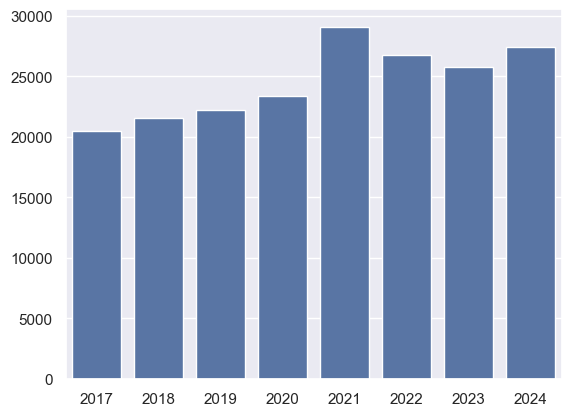

In [15]:
sns.barplot(
    x=df_by_sale.select("year_of_sale").to_numpy().flatten(), 
    y=df_by_sale.select("count_transactions").to_numpy().flatten()
)

In [18]:
df_twn = df.filter(
    pl.col("price_is_geq_one_million").eq(1),
    pl.col("year_of_sale").is_in([2022, 2023, 2024])
).group_by(
    "year_of_sale", "town"
).agg(
    pl.col("address").len().alias("count_transactions")
).sort(
    "town", "year_of_sale"
)

/Users/bryanlim/.pyenv/versions/3.10.13/envs/create-hdb-entities-pipeline/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/bryanlim/.pyenv/versions/3.10.13/envs/create-hdb-entities-pipeline/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/bryanlim/.pyenv/versions/3.10.13/envs/create-hdb-entities-pipeline/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'ANG MO KIO'),
  Text(1, 0, 'BEDOK'),
  Text(2, 0, 'BISHAN'),
  Text(3, 0, 'BUKIT BATOK'),
  Text(4, 0, 'BUKIT MERAH'),
  Text(5, 0, 'BUKIT PANJANG'),
  Text(6, 0, 'BUKIT TIMAH'),
  Text(7, 0, 'CENTRAL AREA'),
  Text(8, 0, 'CLEMENTI'),
  Text(9, 0, 'GEYLANG'),
  Text(10, 0, 'HOUGANG'),
  Text(11, 0, 'JURONG EAST'),
  Text(12, 0, 'KALLANG/WHAMPOA'),
  Text(13, 0, 'MARINE PARADE'),
  Text(14, 0, 'PASIR RIS'),
  Text(15, 0, 'PUNGGOL'),
  Text(16, 0, 'QUEENSTOWN'),
  Text(17, 0, 'SENGKANG'),
  Text(18, 0, 'SERANGOON'),
  Text(19, 0, 'TAMPINES'),
  Text(20, 0, 'TOA PAYOH'),
  Text(21, 0, 'WOODLANDS'),
  Text(22, 0, 'YISHUN')])

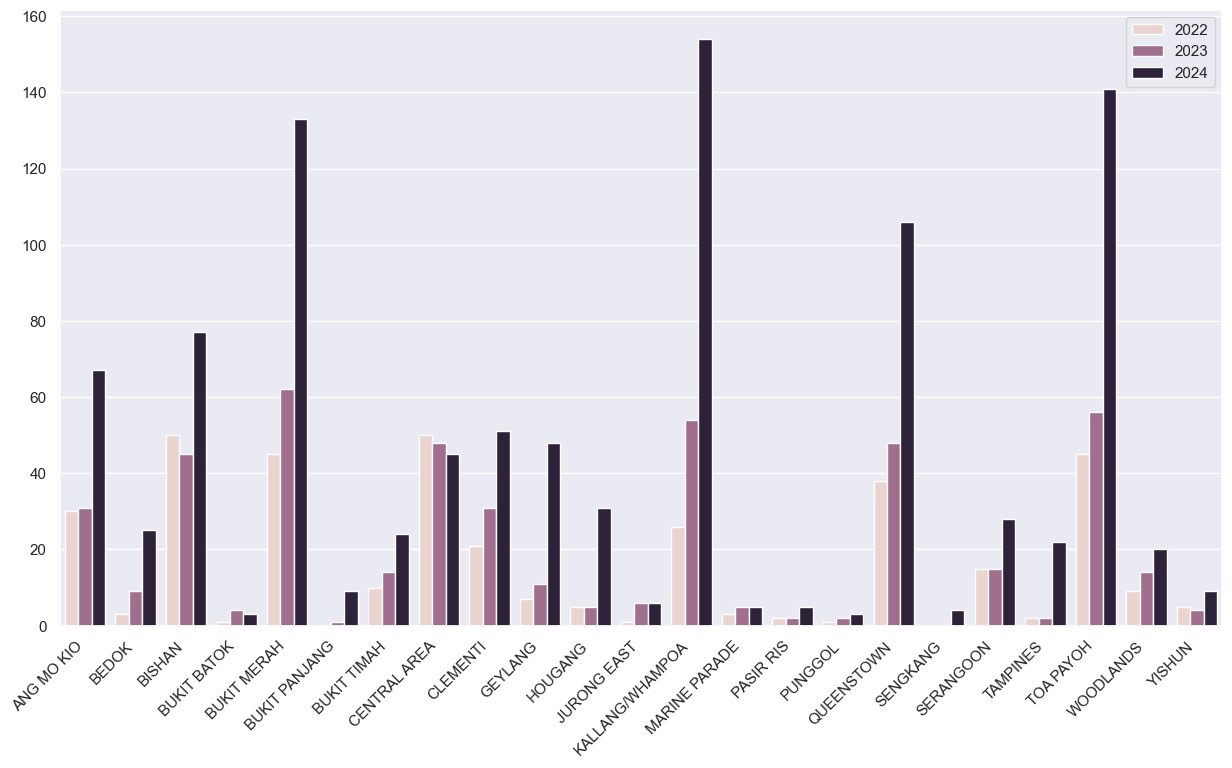

In [19]:
# ... existing code ...

plt.figure(figsize=(15, 8))  # Width: 15 inches, Height: 8 inches
sns.barplot(
    x=df_twn.select("town").to_numpy().flatten(), 
    y=df_twn.select("count_transactions").to_numpy().flatten(),
    hue=df_twn.select("year_of_sale").to_numpy().flatten(),
)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability